# Wizualizacja określająca ilość wypadków z podziałem na dni tygodnia

In [22]:
import sqlite3
import numpy
import matplotlib.pyplot as plt

import pandas as pd
import requests

## Wczytanie bazy danych

In [2]:
nypd_df = pd.read_csv("/home/student/PythonDeveloper/pythonProject/Projekt_Pandas/data/nypd-motor-vehicle-collisions(1).csv")
nypd_df

/tmp/ipykernel_4401/2504016720.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  nypd_df = pd.read_csv("/home/student/PythonDeveloper/pythonProject/Projekt_Pandas/data/nypd-motor-vehicle-collisions(1).csv")#, usecols=["name", "ingredients"]


,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612173,2012-07-21T00:00:00.000,22:46,BROOKLYN,11226.0,40.651741,-73.965241,"{'type': 'Point', 'coordinates': [-73.9652409,...",PARADE PLACE,CROOKE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,147595,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
1612174,2012-07-09T00:00:00.000,16:45,NaN,NaN,NaN,NaN,NaN,EDWARD L GRANT HIGHWAY,WEST 169 STREET,NaN,...,Fatigued/Drowsy,Unspecified,NaN,NaN,85220,PASSENGER VEHICLE,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN
1612175,2012-07-09T00:00:00.000,14:35,NaN,NaN,40.791492,-73.935763,"{'type': 'Point', 'coordinates': [-73.935763, ...",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2853431,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1612176,2012-07-18T00:00:00.000,9:20,MANHATTAN,10024.0,40.779479,-73.973573,"{'type': 'Point', 'coordinates': [-73.9735729,...",CENTRAL PARK WEST,WEST 77 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,52405,SPORT UTILITY / STATION WAGON,VAN,BUS,NaN,NaN


## Zmiana formatu daty

In [3]:
nypd_df['ACCIDENT DATE'] = pd.to_datetime(nypd_df['ACCIDENT DATE'], errors='coerce')
nypd_df

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612173,2012-07-21,22:46,BROOKLYN,11226.0,40.651741,-73.965241,"{'type': 'Point', 'coordinates': [-73.9652409,...",PARADE PLACE,CROOKE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,147595,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
1612174,2012-07-09,16:45,NaN,NaN,NaN,NaN,NaN,EDWARD L GRANT HIGHWAY,WEST 169 STREET,NaN,...,Fatigued/Drowsy,Unspecified,NaN,NaN,85220,PASSENGER VEHICLE,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN
1612175,2012-07-09,14:35,NaN,NaN,40.791492,-73.935763,"{'type': 'Point', 'coordinates': [-73.935763, ...",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2853431,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1612176,2012-07-18,9:20,MANHATTAN,10024.0,40.779479,-73.973573,"{'type': 'Point', 'coordinates': [-73.9735729,...",CENTRAL PARK WEST,WEST 77 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,52405,SPORT UTILITY / STATION WAGON,VAN,BUS,NaN,NaN


## Zamiana daty na dni tygodnia

In [4]:
nypd_days=nypd_df['ACCIDENT DATE'].dt.day_name()
nypd_days

0             Monday
1            Tuesday
2           Thursday
3             Friday
4            Tuesday
             ...    
1612173     Saturday
1612174       Monday
1612175       Monday
1612176    Wednesday
1612177     Thursday
Name: ACCIDENT DATE, Length: 1612178, dtype: object

## Zsumowanie ile razy występuje dany dzień tygodnia

In [6]:
nypd_numbers= nypd_days.value_counts()
nypd_numbers

ACCIDENT DATE
Friday       256236
Thursday     242307
Tuesday      240216
Wednesday    237040
Monday       231946
Saturday     214607
Sunday       189826
Name: count, dtype: int64

## Przekształcenie serii w tabelę oraz nadanie indeksu

In [7]:
df_nypd_numbers = pd.DataFrame(nypd_numbers)
df_nypd_numbers=df_nypd_numbers.reset_index()
df_nypd_numbers

,ACCIDENT DATE,count
0,Friday,256236
1,Thursday,242307
2,Tuesday,240216
3,Wednesday,237040
4,Monday,231946
5,Saturday,214607
6,Sunday,189826


## Nadanie nowych nazw kolumn

In [19]:
df_nypd_numbers = df_nypd_numbers.rename(columns={'ACCIDENT DATE': 'NAME DAY','count':'AMOUNT' })
df_nypd_numbers

,NAME DAY,AMOUNT
0,Friday,256236
1,Thursday,242307
2,Tuesday,240216
3,Wednesday,237040
4,Monday,231946
5,Saturday,214607
6,Sunday,189826


## Utworzenie wykresu słupkowego

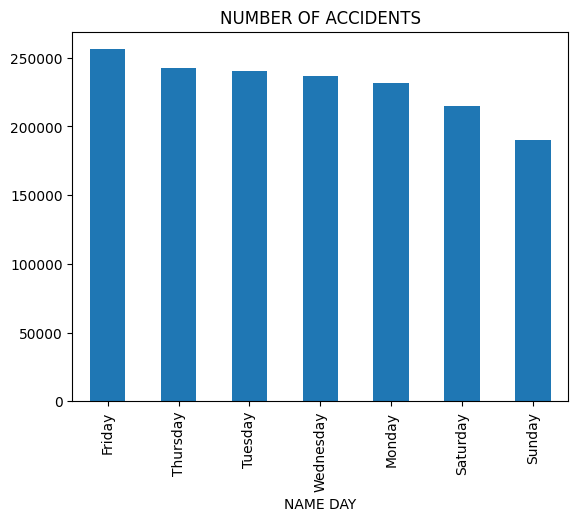

In [24]:
df_nypd_numbers_bar = df_nypd_numbers.plot.bar(x='NAME DAY', y='AMOUNT',title='NUMBER OF ACCIDENTS', legend=False)

## Utworzenie wykresu kołowego

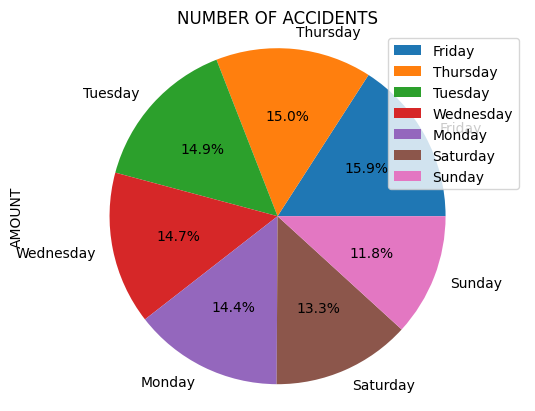

In [36]:
df_nypd_numbers.plot.pie(y='AMOUNT', labels=df_nypd_numbers['NAME DAY'], autopct='%1.1f%%')
plt.title('NUMBER OF ACCIDENTS')
plt.axis('equal')
plt.show()

# Podsumowanie:
## Zgodnie z otrzymanymi danymi i po przeprowadzeniu analizy możemy stwierdzić, że najwięcej wypadków samochodowych w Nowym Yorku wystepuje w piątki, najmniej w niedziele. 
## Na podstawie analizowanych danych za pomocą wykresu kołowego możemy również stwierdzić, że w piątki zdarza się aż 15,9 % wypadków samochodowych. 